# Car Price Prediction



### Life Cycle of ML Project
- Understanding the problem
- Data Collection
- Data Checks to perform 
- Exploratory data analysis
- Data Pre-processing

## 1) Problem Statement
- This project understands how the Car's Price is affected by other variables such as amount, cc_type, kms_driven. 

## 2) Data Collection
Dataset got scraped form - https://www.cars24.com/


Dataset consists of 11-columns : 

 - Year	
 - Company
 - Model
 - Transmission
 - Engine_Type
 - Kms_Driven
 - ownership
 - Fuel_Type
 - Passing	
 - Area	
 - Price


Data consists of approx 8k rows 

### 2.1 Import Data and required packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv data as DataFrame

In [2]:
df = pd.read_csv('../data/Cars_24.csv')

In [3]:
df

,Year,Company,Model,Transmission,Engine_Type,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
0,2018,Maruti,IGNIS,Manual,SIGMA 1.2,"35,874 km",2nd Owner,Petrol,DL-12,Gurugram,"3,97,000"
1,2011,Maruti,Ritz,Manual,VXI,"64,449 km",2nd Owner,Petrol,MH-01,Nagpur,"1,88,000"
2,2010,Maruti,Alto,Manual,LXI,"49,984 km",1st Owner,Petrol,UP-14,Noida,"1,22,000"
3,2010,Maruti,Alto K10,Manual,VXI,"60,180 km",2nd Owner,Petrol,HR-20,Faridabad,"1,77,000"
4,2014,Maruti,Swift,Manual,VXI D,"59,956 km",2nd Owner,Petrol,MH-03,Pune,"3,54,000"
...,...,...,...,...,...,...,...,...,...,...,...
7859,2019,MG,HECTOR,Manual,SUPER DIESEL,"24,618 km",1st Owner,Diesel,GJ-05,Surat,"13,15,000"
7860,2019,MG,HECTOR,Manual,SUPER DIESEL,"53,140 km",2nd Owner,Diesel,HR-26,Gurugram,"12,17,000"
7861,2019,MG,HECTOR,Manual,SHARP 2.0 DIESEL,"56,561 km",1st Owner,Diesel,TS-07,Hyderabad,"16,15,000"
7862,2020,MG,HECTOR PLUS,Automatic,SHARP DCT,"59,688 km",1st Owner,Petrol,TS-09,Hyderabad,"16,90,000"


In [4]:
df.sample(5)

,Year,Company,Model,Transmission,Engine_Type,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
2180,2018,Maruti,Baleno,Manual,ZETA PETROL 1.2,"64,267 km",1st Owner,Petrol,MH-03,Nagpur,"6,25,000"
6082,2016,Honda,City,Manual,1.5L I-VTEC VX,"50,688 km",2nd Owner,Petrol,MH-04,Navi Mumbai,"6,37,000"
5871,2011,Honda,City,Automatic,1.5L I-VTEC V AT,"99,520 km",1st Owner,Petrol,HR-26,Gurugram,"3,35,000"
1121,2015,Maruti,Swift Dzire,Manual,VXI,"31,059 km",1st Owner,Petrol,DL-2C,Noida,"4,50,000"
6994,2014,Volkswagen,Polo,Manual,HIGHLINE1.2L,"95,145 km",2nd Owner,Petrol,TN-14,Chennai,"4,82,000"


In [5]:
df.shape

(7864, 11)

### 2.2 Dataset Information

- Company
- Model 
- Engine_Type
- Transmission --------> Gear Transmission (Auto / Manual)
- Year  -------------> Year of purchasing
- Kms_Driven   ------> Total kile meters used
- Fuel_Type ----> Petrol / Electric
- Area	 -----------> Place of Buying/Selling
- Passing ---------> State of registration
- Ownership ---> First hand / Second hand / Thrid Hand / Fourth hand 
- Price -----------> Output variable (cost of the car)

## 3) Data checks to perform

- Check missing values
- Check Duplicates
- Check Data Types
- Check the number of unique values of each column
- Check Statistics of data set
- Check Various categoreis present in the different categorical columns

### 3.1 Check missing values

In [6]:
df.isna().sum()

Year            0
Company         0
Model           0
Transmission    0
Engine_Type     0
Kms_Driven      0
ownership       0
Fuel_Type       0
Passing         0
Area            0
Price           0
dtype: int64

No null values present

### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

0

No duplicates present

### 3.3 Check for data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7864 entries, 0 to 7863
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          7864 non-null   int64 
 1   Company       7864 non-null   object
 2   Model         7864 non-null   object
 3   Transmission  7864 non-null   object
 4   Engine_Type   7864 non-null   object
 5   Kms_Driven    7864 non-null   object
 6   ownership     7864 non-null   object
 7   Fuel_Type     7864 non-null   object
 8   Passing       7864 non-null   object
 9   Area          7864 non-null   object
 10  Price         7864 non-null   object
dtypes: int64(1), object(10)
memory usage: 675.9+ KB


In [9]:
df.Kms_Driven.sample(20)

5016      34,637 km
1873      17,140 km
4927      13,833 km
5979      89,150 km
3046    1,21,617 km
2107      26,485 km
1764      96,858 km
4923      57,445 km
1560      15,466 km
4518      26,726 km
6099      87,392 km
3356      76,032 km
4013      34,497 km
1292      57,265 km
5754      51,007 km
2587      26,147 km
5860      47,833 km
2315      42,212 km
416       82,171 km
2904      85,876 km
Name: Kms_Driven, dtype: object

In [10]:
def chng_num_to_int(string):
    if 'km' in string:
        string = string.replace('km', '')
    if ',' in string:
        string = string.replace(',', '')
        return int(string)
    return string

In [11]:
df['Kms_Driven'] = df.apply(lambda row : chng_num_to_int(row['Kms_Driven']), axis = 1)
df['Kms_Driven'] = df['Kms_Driven'].astype('int')

In [12]:
df['Price'] = df.apply(lambda row : chng_num_to_int(row['Price']), axis = 1)
df['Price'] = df['Price'].astype('int')

In [13]:
df.Kms_Driven.sample(5)

4475    30264
5327    14121
389      2924
5399    54178
7153    22473
Name: Kms_Driven, dtype: int64

### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

Year              14
Company           16
Model            127
Transmission       2
Engine_Type     1126
Kms_Driven      7561
ownership          4
Fuel_Type          3
Passing          437
Area              27
Price           1255
dtype: int64

In [15]:
df.drop(columns=['Engine_Type'], inplace= True)

In [16]:
np.sort(df.Year.unique())

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023])

In [17]:
np.sort(df.Company.unique())

array(['BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'KIA', 'MG',
       'Mahindra', 'Maruti', 'Nissan', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen'], dtype=object)

In [18]:
np.sort(df.Model.unique())

array(['3 Series', 'A Star', 'ALCAZAR', 'ALTROZ', 'AURA', 'Accord',
       'Alto', 'Alto 800', 'Alto K10', 'Amaze', 'Ameo', 'BOLERO NEO',
       'BR-V', 'BREZZA', 'Baleno', 'Bolero', 'Bolt', 'Brio', 'CARENS',
       'CRV', 'Camry', 'Captur', 'Celerio', 'Celerio X', 'Ciaz', 'City',
       'Civic', 'Compass', 'Corolla Altis', 'Creta', 'Duster', 'Dzire',
       'Ecosport', 'Eeco', 'Elite i20', 'Endeavour', 'Eon', 'Ertiga',
       'Etios', 'Etios Liva', 'FREESTYLE', 'Figo Aspire', 'Fortuner',
       'GRAND CHEROKEE', 'GRAND I10 NIOS', 'Glanza', 'Go', 'Go Plus',
       'Grand i10', 'HECTOR', 'HECTOR PLUS', 'Harrier', 'Hexa', 'IGNIS',
       'Innova', 'Innova Crysta', 'Jazz', 'Jetta', 'KUSHAQ',
       'KUV 100 NXT', 'Kiger', 'Kuv100', 'Kwid', 'MAGNITE', 'MARAZZO',
       'Micra', 'Micra Active', 'NEW I20', 'NEW I20 N LINE', 'NEW SANTRO',
       'NEXON', 'New Elantra', 'New Figo', 'New Wagon-R', 'OMNI E',
       'Octavia', 'PUNCH', 'Passat', 'Polo', 'Pulse', 'Rapid', 'Redi Go',
       'Ritz',

In [19]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [21]:
df.ownership.unique()

array(['2nd Owner', '1st Owner', '3rd Owner', '4th Owner'], dtype=object)

In [22]:
np.sort(df.Passing.unique())

array(['22-BH', 'AP-07', 'AP-09', 'AP-10', 'AP-11', 'AP-13', 'AP-15',
       'AP-21', 'AP-22', 'AP-23', 'AP-28', 'AP-29', 'AP-30', 'AP-39',
       'BR-01', 'BR-02', 'BR-03', 'BR-06', 'BR-07', 'BR-09', 'BR-31',
       'BR-53', 'CH-01', 'DL-10', 'DL-11', 'DL-12', 'DL-13', 'DL-14',
       'DL-1C', 'DL-2C', 'DL-3C', 'DL-4C', 'DL-5C', 'DL-6C', 'DL-7C',
       'DL-8C', 'DL-9C', 'GJ-01', 'GJ-02', 'GJ-03', 'GJ-04', 'GJ-05',
       'GJ-06', 'GJ-07', 'GJ-08', 'GJ-09', 'GJ-10', 'GJ-12', 'GJ-13',
       'GJ-14', 'GJ-15', 'GJ-16', 'GJ-17', 'GJ-18', 'GJ-19', 'GJ-20',
       'GJ-21', 'GJ-22', 'GJ-23', 'GJ-24', 'GJ-26', 'GJ-27', 'GJ-30',
       'GJ-31', 'GJ-32', 'GJ-35', 'GJ-36', 'GJ-38', 'HR-01', 'HR-02',
       'HR-03', 'HR-05', 'HR-06', 'HR-07', 'HR-10', 'HR-11', 'HR-12',
       'HR-13', 'HR-14', 'HR-16', 'HR-18', 'HR-19', 'HR-20', 'HR-21',
       'HR-22', 'HR-23', 'HR-24', 'HR-26', 'HR-27', 'HR-29', 'HR-30',
       'HR-31', 'HR-34', 'HR-35', 'HR-36', 'HR-49', 'HR-50', 'HR-51',
       'HR-52', 'HR-

In [23]:
df.Area.value_counts()

Area
 Bengaluru       1045
 Hyderabad        735
 Pune             626
 Chennai          583
 Noida            531
 New Delhi        523
 Ahmedabad        498
 Mumbai           444
 Gurugram         366
 Kolkata          278
 Lucknow          263
 Chandigarh       225
 Benga...         196
 Nagpur           158
 Jaipur           153
 Navi Mumbai      145
 Lasudia Mori     134
 Faridabad        134
 Kochi            131
 Surat            128
 Ghaziabad        116
 Patna            115
 Rajkot            96
 Nasik             75
 Ludhiana          69
 Coimbatore        69
 Rohtak            28
Name: count, dtype: int64

In [24]:
df.loc[df.Area==' Benga...']

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
130,2016,Maruti,Ertiga,Manual,54733,1st Owner,Diesel,KA-01,Benga...,822000
132,2015,Maruti,Swift,Manual,89200,1st Owner,Petrol,KA-50,Benga...,479000
148,2016,Maruti,Alto K10,Manual,69898,1st Owner,Petrol,KA-05,Benga...,330000
163,2014,Maruti,Ertiga,Manual,84890,1st Owner,Diesel,KA-05,Benga...,768000
504,2018,Maruti,Baleno,Manual,85705,1st Owner,Diesel,KA-05,Benga...,592000
...,...,...,...,...,...,...,...,...,...,...
7724,2022,Skoda,SLAVIA,Automatic,22496,1st Owner,Petrol,KA-09,Benga...,1535000
7727,2012,Skoda,Rapid,Manual,113536,3rd Owner,Diesel,KA-01,Benga...,327000
7771,2020,KIA,SELTOS,Manual,11840,2nd Owner,Diesel,KA-51,Benga...,1403000
7789,2019,KIA,SELTOS,Automatic,49589,1st Owner,Petrol,KA-51,Benga...,1653000


In [25]:
df.loc[df.Area==' Benga...', 'Area'] = 'Bengaluru'

In [26]:
df.loc[df.Area==' Benga...']

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price


In [27]:
df.nunique()

Year              14
Company           16
Model            127
Transmission       2
Kms_Driven      7561
ownership          4
Fuel_Type          3
Passing          437
Area              27
Price           1255
dtype: int64

In [28]:
print("Categories in 'Company' variable:    ", end=' ')
print(np.sort(df['Company'].unique()), end='\n\n\n')

print("Categories in 'Model' variable:    ", end=' ')
print(np.sort(df['Model'].unique()), end='\n\n\n')

print("Categories in 'Year' variable:    ", end=' ')
print(np.sort(df['Year'].unique()), end='\n\n')

print("Categories in 'Fuel_type' variable:    ", end=' ')
print(df['Fuel_Type'].unique(), end='\n\n\n')

print("Categories in 'Passing' variable:    ", end=' ')
print(np.sort(df['Passing'].unique()), end='\n\n\n')

print("Categories in 'Area' variable:    ", end=' ')
print(np.sort(df['Area'].unique()), end='\n\n\n')

print("Categories in 'Transmission' variable:    ", end=' ')
print(df['Transmission'].unique(), end='\n\n\n')

print("Categories in 'ownership' variable:    ", end=' ')
print(df['ownership'].unique(), end='\n\n\n')



Categories in 'Company' variable:     ['BMW' 'Datsun' 'Ford' 'Honda' 'Hyundai' 'Jeep' 'KIA' 'MG' 'Mahindra'
 'Maruti' 'Nissan' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen']


Categories in 'Model' variable:     ['3 Series' 'A Star' 'ALCAZAR' 'ALTROZ' 'AURA' 'Accord' 'Alto' 'Alto 800'
 'Alto K10' 'Amaze' 'Ameo' 'BOLERO NEO' 'BR-V' 'BREZZA' 'Baleno' 'Bolero'
 'Bolt' 'Brio' 'CARENS' 'CRV' 'Camry' 'Captur' 'Celerio' 'Celerio X'
 'Ciaz' 'City' 'Civic' 'Compass' 'Corolla Altis' 'Creta' 'Duster' 'Dzire'
 'Ecosport' 'Eeco' 'Elite i20' 'Endeavour' 'Eon' 'Ertiga' 'Etios'
 'Etios Liva' 'FREESTYLE' 'Figo Aspire' 'Fortuner' 'GRAND CHEROKEE'
 'GRAND I10 NIOS' 'Glanza' 'Go' 'Go Plus' 'Grand i10' 'HECTOR'
 'HECTOR PLUS' 'Harrier' 'Hexa' 'IGNIS' 'Innova' 'Innova Crysta' 'Jazz'
 'Jetta' 'KUSHAQ' 'KUV 100 NXT' 'Kiger' 'Kuv100' 'Kwid' 'MAGNITE'
 'MARAZZO' 'Micra' 'Micra Active' 'NEW I20' 'NEW I20 N LINE' 'NEW SANTRO'
 'NEXON' 'New Elantra' 'New Figo' 'New Wagon-R' 'OMNI E' 'Octavia' 'PUNCH'
 'Passat' 'P

### 3.5 Check statistics of dataset

In [29]:
df.describe()

,Year,Kms_Driven,Price
count,7864.000000,7864.000000,7.864000e+03
mean,2017.049466,51747.980417,5.825571e+05
std,2.858389,27126.702463,2.653426e+05
min,2010.000000,0.000000,1.220000e+05
25%,2015.000000,29965.250000,4.020000e+05
50%,2017.000000,49485.000000,5.430000e+05
75%,2019.000000,71048.500000,7.080000e+05
max,2023.000000,244253.000000,3.142000e+06


## 4) Exploring Data (Vizualization)

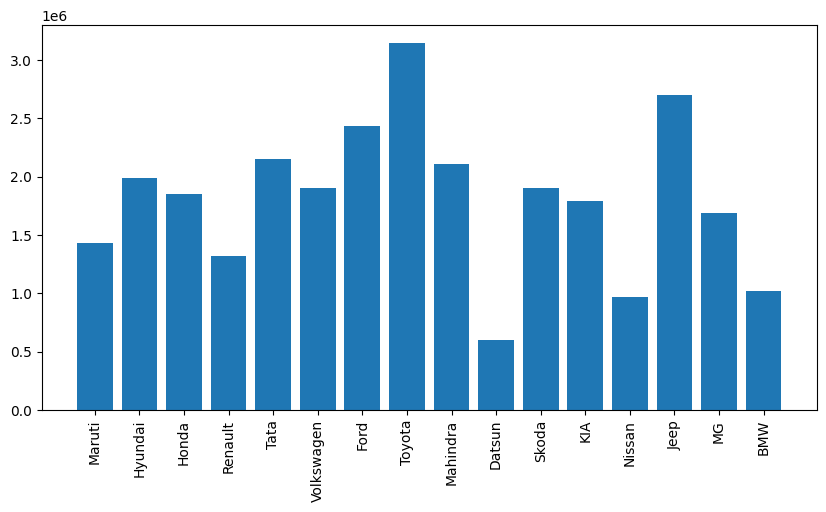

In [30]:
# fig, ax = plt.subplots()
plt.figure(figsize=(10,5))
plt.bar(df['Company'],df['Price'])
plt.xticks(rotation = 90) 
plt.show()

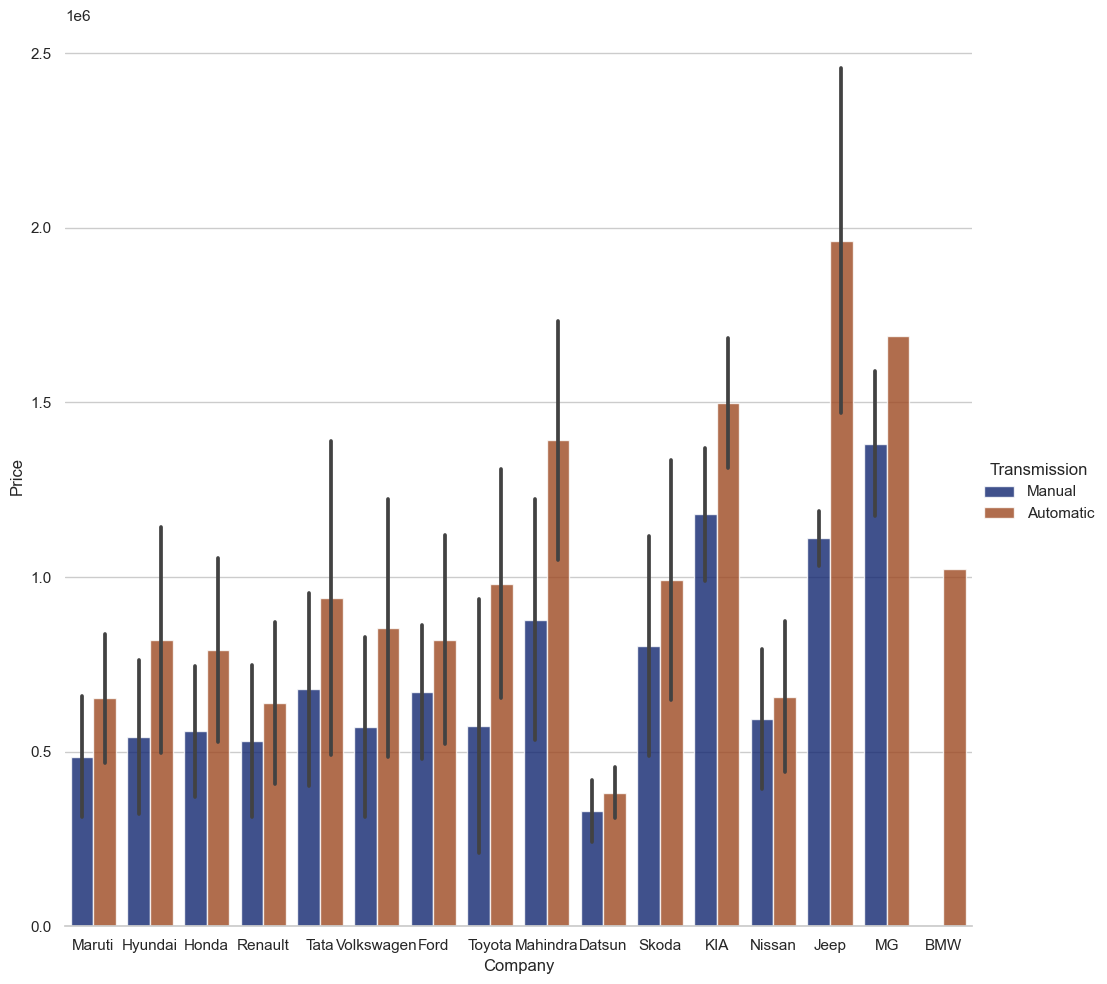

In [31]:
# plt.figure(figsize=(10,10))


sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="Company", y="Price", hue="Transmission",
    errorbar="sd", palette="dark", alpha=.8, height=10
)
g.despine(left=True)
g.set_axis_labels("Company", "Price")
plt.show()

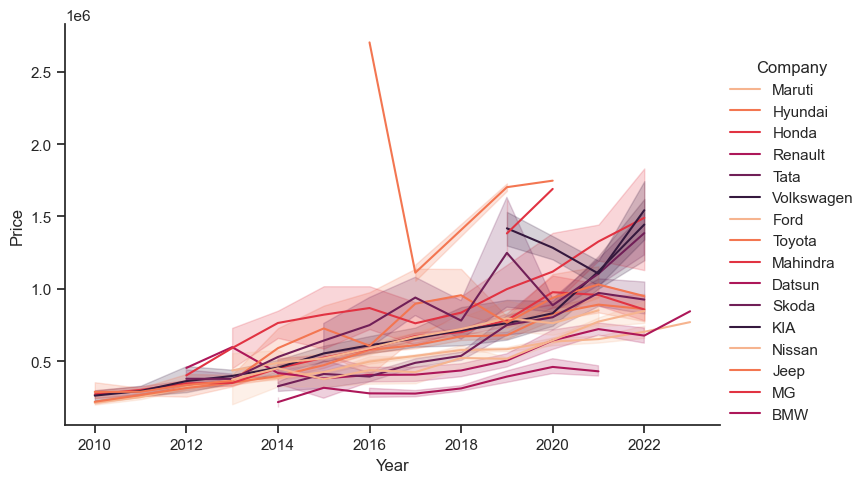

In [32]:


sns.set_theme(style="ticks")

palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=df,
    x="Year", y="Price",
    hue="Company",  
    kind="line",  palette=palette,
    height=5, aspect=1.5, facet_kws=dict(sharex=False),
)

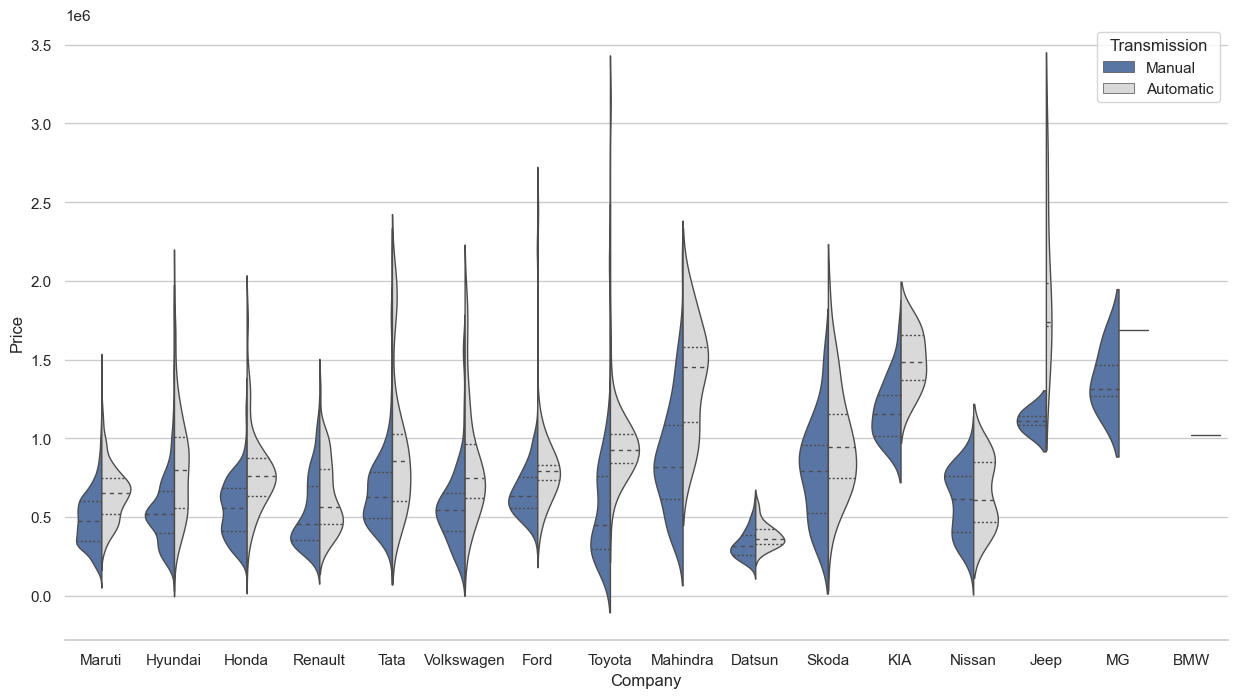

In [33]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")

# Load the example tips dataset

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="Company", y="Price", hue="Transmission",
               split=True, inner="quart", linewidth=1,
               palette={"Manual": "b", "Automatic": ".85"})
sns.despine(left=True)

<Axes: xlabel='Price', ylabel='Count'>

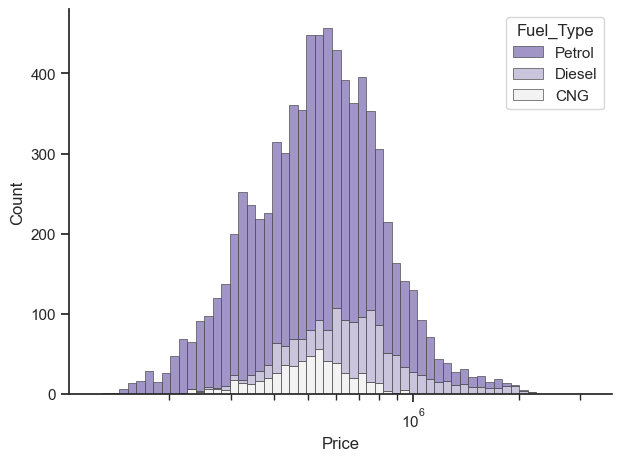

In [34]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="Price", hue="Fuel_Type",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [38]:
df.to_csv('../data/Cars_24.csv', index=None)

In [41]:
for comp in np.sort(df.Company.unique()):
    models = df.loc[df['Company']==comp, 'Model'].unique()
    print(comp)
    print(np.sort(models), end='\n\n')

BMW
['3 Series']

Datsun
['Go' 'Go Plus' 'Redi Go']

Ford
['Ecosport' 'Endeavour' 'FREESTYLE' 'Figo Aspire' 'New Figo']

Honda
['Accord' 'Amaze' 'BR-V' 'Brio' 'CRV' 'City' 'Civic' 'Jazz' 'WR-V']

Hyundai
['ALCAZAR' 'AURA' 'Creta' 'Elite i20' 'Eon' 'GRAND I10 NIOS' 'Grand i10'
 'NEW I20' 'NEW I20 N LINE' 'NEW SANTRO' 'New Elantra' 'Santro Xing'
 'Sonata' 'Tucson New' 'VENUE' 'Verna' 'Xcent' 'i10' 'i20' 'i20 Active']

Jeep
['Compass' 'GRAND CHEROKEE']

KIA
['CARENS' 'SELTOS' 'SONET']

MG
['HECTOR' 'HECTOR PLUS']

Mahindra
['BOLERO NEO' 'Bolero' 'KUV 100 NXT' 'Kuv100' 'MARAZZO' 'Scorpio'
 'TUV 300 PLUS' 'TUV300' 'Thar' 'XUV 3OO' 'XUV500' 'XUV700']

Maruti
['A Star' 'Alto' 'Alto 800' 'Alto K10' 'BREZZA' 'Baleno' 'Celerio'
 'Celerio X' 'Ciaz' 'Dzire' 'Eeco' 'Ertiga' 'IGNIS' 'New Wagon-R' 'OMNI E'
 'Ritz' 'S Cross' 'S PRESSO' 'Swift' 'Swift Dzire' 'Vitara Brezza'
 'Wagon R' 'Wagon R 1.0' 'Wagon R Stingray' 'XL6' 'Zen Estilo']

Nissan
['MAGNITE' 'Micra' 'Micra Active' 'Sunny' 'Terrano']

Rena